In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Data


In [43]:
df = pd.read_csv(r'C:\Users\caglar\OneDrive\Dokumente\CT\ODTÜ\Education\MSc\Courses\CENG562\PROJECT\Data\FullDataset.csv',sep=';', encoding='utf-8')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177 entries, 0 to 2176
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EventID          2177 non-null   int64  
 1   EventDate        2177 non-null   object 
 2   EpicenterAgency  2177 non-null   object 
 3   EpicenterLon     2177 non-null   float64
 4   EpicenterLat     2177 non-null   float64
 5   Type             2177 non-null   object 
 6   Magnitude        2177 non-null   float64
 7   Depth            2177 non-null   float64
 8   Location         2177 non-null   object 
 9   Code             2177 non-null   object 
 10  Longitude        2177 non-null   float64
 11  Latitude         2177 non-null   float64
 12  Province         2177 non-null   object 
 13  District         2177 non-null   object 
 14  PGA_NS           2174 non-null   float64
 15  PGA_EW           2174 non-null   float64
 16  PGA_UD           2174 non-null   float64
 17  Repi          

# To drop unnecessary columns 

In [45]:
df=df.drop(columns=['EpicenterLon','EpicenterLat','Province','EventID','EventDate','EpicenterAgency','Type','Location','Code','Latitude','Longitude'])

In [46]:
df

,Magnitude,Depth,District,PGA_NS,PGA_EW,PGA_UD,Repi
0,6.2,4.91,Silivri,72.668544,106.363096,34.493353,25.042498
1,6.2,4.91,Marmaraereğlisi,107.381914,68.336287,29.057604,29.150529
2,6.2,4.91,Avcılar,99.267407,81.124645,64.244065,43.050636
3,6.2,4.91,Küçükçekmece,210.197863,138.987994,71.593687,47.011711
4,6.2,4.91,Çerkezköy,24.963441,25.734547,12.330260,49.862761
...,...,...,...,...,...,...,...
2172,7.6,17.00,Merkezefendi,5.920000,11.690000,3.690000,334.730000
2173,7.6,17.00,Tosya,11.690000,8.910000,4.430000,345.240000
2174,7.6,17.00,Bornova,9.890000,10.800000,3.330000,346.530000
2175,7.6,17.00,Efeler,5.980000,5.250000,3.300000,371.910000


In [47]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Magnitude    0
Depth        0
District     0
PGA_NS       3
PGA_EW       3
PGA_UD       3
Repi         0
dtype: int64


In [ ]:
df.dropna(inplace=True)

In [49]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Magnitude    0
Depth        0
District     0
PGA_NS       0
PGA_EW       0
PGA_UD       0
Repi         0
dtype: int64


In [50]:
df

,Magnitude,Depth,District,PGA_NS,PGA_EW,PGA_UD,Repi
0,6.2,4.91,Silivri,72.668544,106.363096,34.493353,25.042498
1,6.2,4.91,Marmaraereğlisi,107.381914,68.336287,29.057604,29.150529
2,6.2,4.91,Avcılar,99.267407,81.124645,64.244065,43.050636
3,6.2,4.91,Küçükçekmece,210.197863,138.987994,71.593687,47.011711
4,6.2,4.91,Çerkezköy,24.963441,25.734547,12.330260,49.862761
...,...,...,...,...,...,...,...
2172,7.6,17.00,Merkezefendi,5.920000,11.690000,3.690000,334.730000
2173,7.6,17.00,Tosya,11.690000,8.910000,4.430000,345.240000
2174,7.6,17.00,Bornova,9.890000,10.800000,3.330000,346.530000
2175,7.6,17.00,Efeler,5.980000,5.250000,3.300000,371.910000


In [51]:
df['PGA_H'] = (np.sqrt(df['PGA_EW']*df['PGA_NS']))

In [52]:
df

,Magnitude,Depth,District,PGA_NS,PGA_EW,PGA_UD,Repi,PGA_H
0,6.2,4.91,Silivri,72.668544,106.363096,34.493353,25.042498,87.916161
1,6.2,4.91,Marmaraereğlisi,107.381914,68.336287,29.057604,29.150529,85.662602
2,6.2,4.91,Avcılar,99.267407,81.124645,64.244065,43.050636,89.738693
3,6.2,4.91,Küçükçekmece,210.197863,138.987994,71.593687,47.011711,170.923900
4,6.2,4.91,Çerkezköy,24.963441,25.734547,12.330260,49.862761,25.346061
...,...,...,...,...,...,...,...,...
2172,7.6,17.00,Merkezefendi,5.920000,11.690000,3.690000,334.730000,8.318942
2173,7.6,17.00,Tosya,11.690000,8.910000,4.430000,345.240000,10.205778
2174,7.6,17.00,Bornova,9.890000,10.800000,3.330000,346.530000,10.334989
2175,7.6,17.00,Efeler,5.980000,5.250000,3.300000,371.910000,5.603124


In [53]:
# Outlier extraction using z-score
df['z_score'] = (df['PGA_H'] - df['PGA_H'].mean()) / df['PGA_H'].std()

df = df[df['z_score'].abs() < 3]

df

,Magnitude,Depth,District,PGA_NS,PGA_EW,PGA_UD,Repi,PGA_H,z_score
0,6.2,4.91,Silivri,72.668544,106.363096,34.493353,25.042498,87.916161,0.646386
1,6.2,4.91,Marmaraereğlisi,107.381914,68.336287,29.057604,29.150529,85.662602,0.623037
2,6.2,4.91,Avcılar,99.267407,81.124645,64.244065,43.050636,89.738693,0.665269
3,6.2,4.91,Küçükçekmece,210.197863,138.987994,71.593687,47.011711,170.923900,1.506434
4,6.2,4.91,Çerkezköy,24.963441,25.734547,12.330260,49.862761,25.346061,-0.001907
...,...,...,...,...,...,...,...,...,...
2172,7.6,17.00,Merkezefendi,5.920000,11.690000,3.690000,334.730000,8.318942,-0.178326
2173,7.6,17.00,Tosya,11.690000,8.910000,4.430000,345.240000,10.205778,-0.158776
2174,7.6,17.00,Bornova,9.890000,10.800000,3.330000,346.530000,10.334989,-0.157437
2175,7.6,17.00,Efeler,5.980000,5.250000,3.300000,371.910000,5.603124,-0.206464


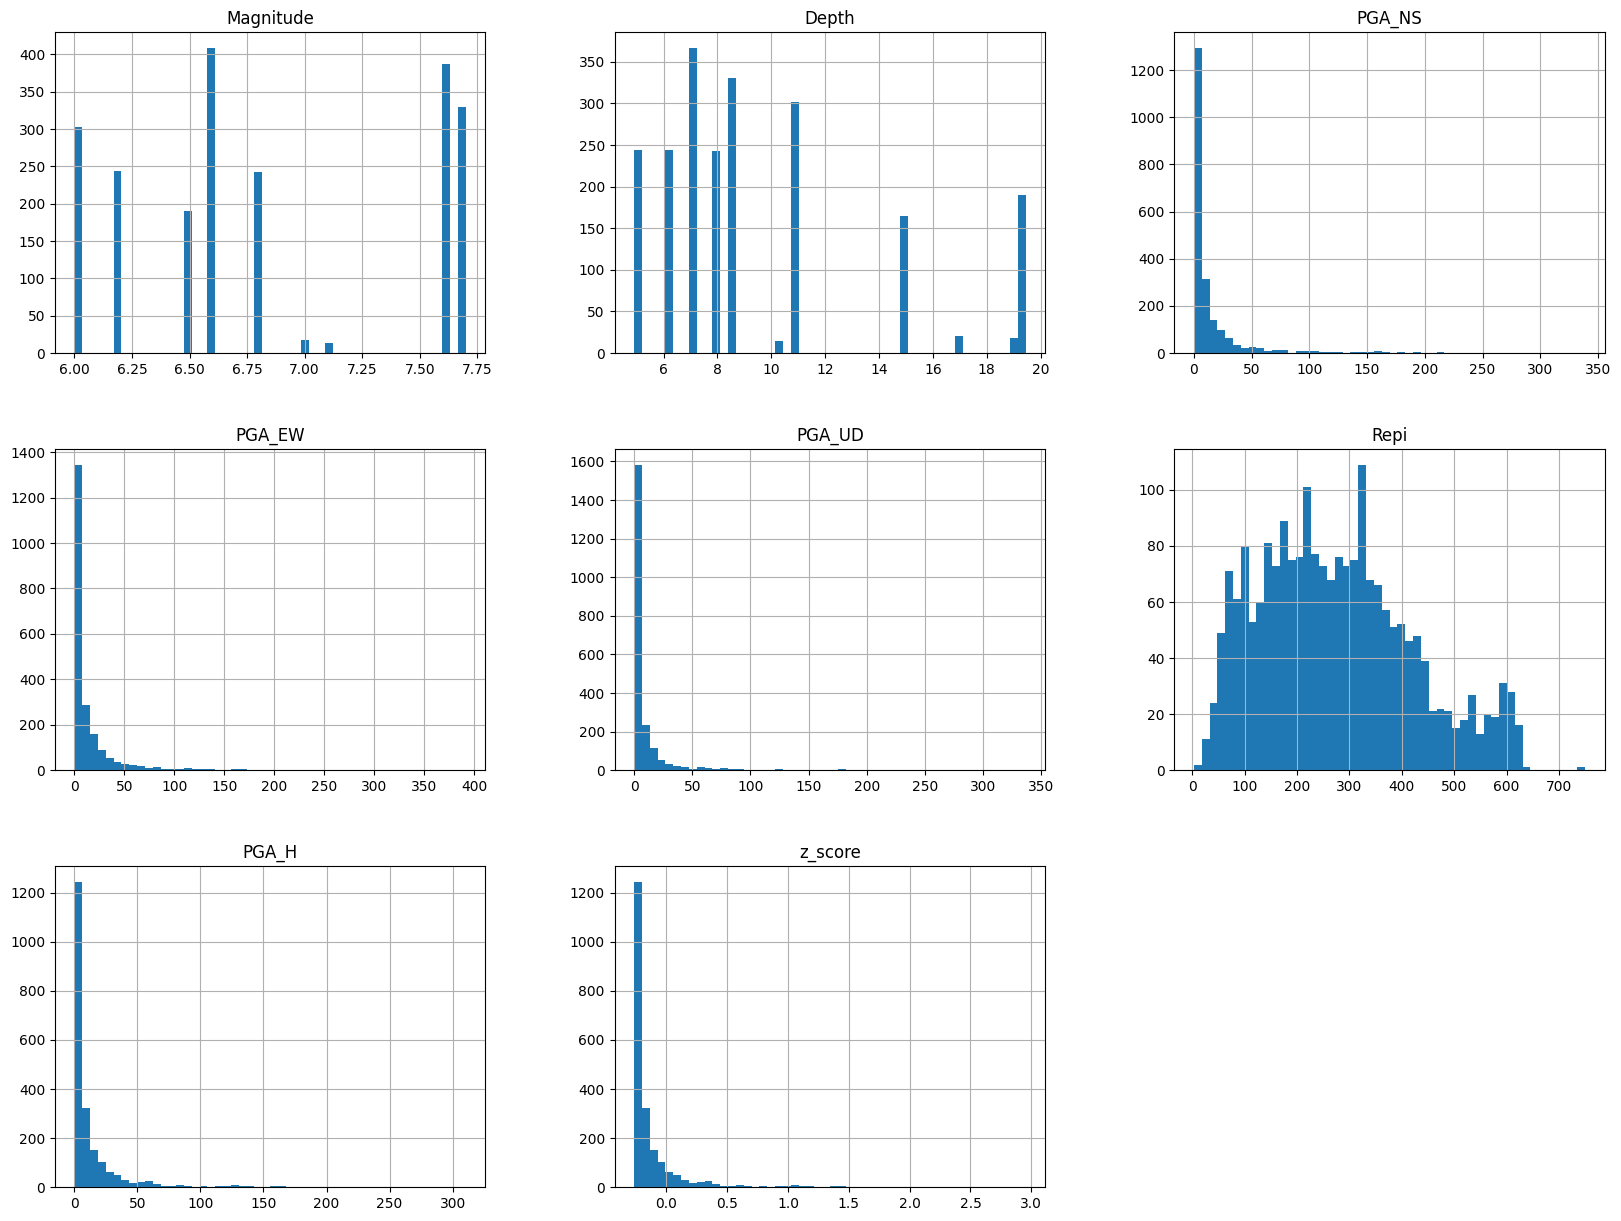

In [54]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [17]:
param_grids = {
    "GradientBoosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9],
        'min_child_weight': [1, 5, 10],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    },
    "AdaBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'loss': ['linear', 'square']
    },
    "CatBoost": {
        'iterations': [100, 200],  
        'depth': [4, 6, 8],  
        'learning_rate': [0.01, 0.05], 
        'l2_leaf_reg': [3, 5], 
        'border_count': [32, 50],
        'bagging_temperature': [0.0, 0.5]  
    },
    "LightGBM": {
        'num_leaves': [15, 31],  
        'learning_rate': [0.05],  
        'n_estimators': [50], 
        'max_depth': [3, 5],  
        'min_child_samples': [50],
        'subsample': [0.8], 
        'colsample_bytree': [0.8],  
        'max_bin': [63],  
        'lambda_l1': [0],  
        'lambda_l2': [0]   
    },

    "RandomForest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
}

## Horizontal PGA

In [14]:
X = df[['Magnitude', 'Repi', 'Depth']]
y = df['PGA_H']

In [ ]:
# Train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Text(0.5, 0, 'PGA (cm/s$^2$)')

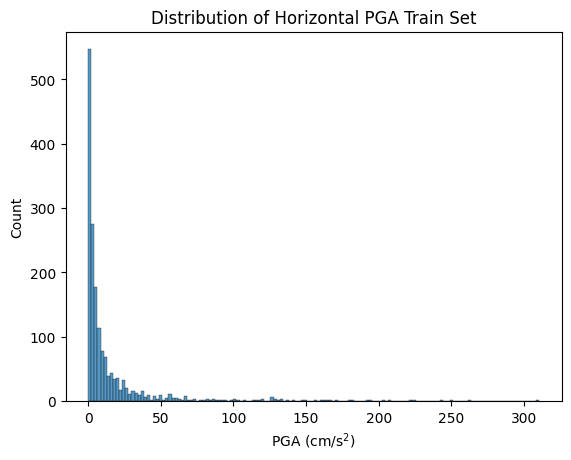

In [34]:
sns.histplot(y_train)
plt.title('Distribution of Horizontal PGA Train Set')
plt.xlabel('PGA (cm/s$^2$)')


# Horizontal PGA Bagging and Boosting Initialization


In [18]:
# Initialize models
models = {
    "GradientBoosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0),
    "LightGBM": LGBMRegressor(),
    "RandomForest": RandomForestRegressor()
}

# Grid search for each model
best_models = {}
results = []
for name, model in models.items():
    print(f"Running GridSearch for {name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], 
                               scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    
    # Evaluate best model on test data
    y_test_pred = best_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
    # Evaluate best model on train data
    y_train_pred = best_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    
    results.append({
        "Model": name,
        "Best Parameters": grid_search.best_params_,
        "Train R2": train_r2,
        "Test R2": test_r2,
        "Train MSE": train_mse,
        "Test MSE": test_mse,
        "Train RMSE": train_rmse,
        "Test RMSE": test_rmse,
        "Train MAE": train_mae,
        "Test MAE": test_mae,
        "Train MAPE": train_mape,
        "Test MAPE": test_mape,
    })

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to a CSV file
results_df.to_csv('model_results_with_train_test_comparison.csv', index=False)


Running GridSearch for GradientBoosting...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Running GridSearch for XGBoost...
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.8}
Running GridSearch for AdaBoost...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for AdaBoost: {'learning_rate': 0.2, 'loss': 'linear', 'n_estimators': 100}
Running GridSearch for CatBoost...
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters for CatBoost: {'bagging_temperature': 0.0, 'border_count': 32, 'depth': 4, 'iterations': 200, 'l2_leaf_reg': 5, 'learning_rate': 0.05}
Running GridSearch for LightGBM...
Fitting 5 folds for each 

# Results (Horizontal)

In [19]:
results_df

,Model,Best Parameters,Train R2,Test R2,Train MSE,Test MSE,Train RMSE,Test RMSE,Train MAE,Test MAE,Train MAPE,Test MAPE
0,GradientBoosting,"{'learning_rate': 0.1, 'max_depth': 3, 'min_sa...",0.781516,0.784128,223.808862,153.573771,14.960243,12.392488,6.919687,6.134605,140.933081,131.078429
1,XGBoost,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.765720,0.792741,239.990563,147.446991,15.491629,12.142775,7.042054,6.011946,123.924326,116.038236
2,AdaBoost,"{'learning_rate': 0.2, 'loss': 'linear', 'n_es...",0.654949,0.669709,353.461591,234.973075,18.800574,15.328831,10.539405,9.088158,357.381452,318.870685
3,CatBoost,"{'bagging_temperature': 0.0, 'border_count': 3...",0.711612,0.756145,295.416744,173.481772,17.187692,13.171248,7.578954,6.207242,107.468800,95.424049
4,LightGBM,"{'colsample_bytree': 0.8, 'lambda_l1': 0, 'lam...",0.622745,0.682512,386.450047,225.865209,19.658333,15.028813,8.624917,6.985923,206.290966,177.304575
5,RandomForest,"{'bootstrap': True, 'max_depth': None, 'min_sa...",0.804420,0.764463,200.347415,167.563780,14.154413,12.944643,5.750410,5.997637,79.869865,95.968501


In [20]:
results_df = results_df.round(4)
results_df.to_csv("Results.csv")

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0


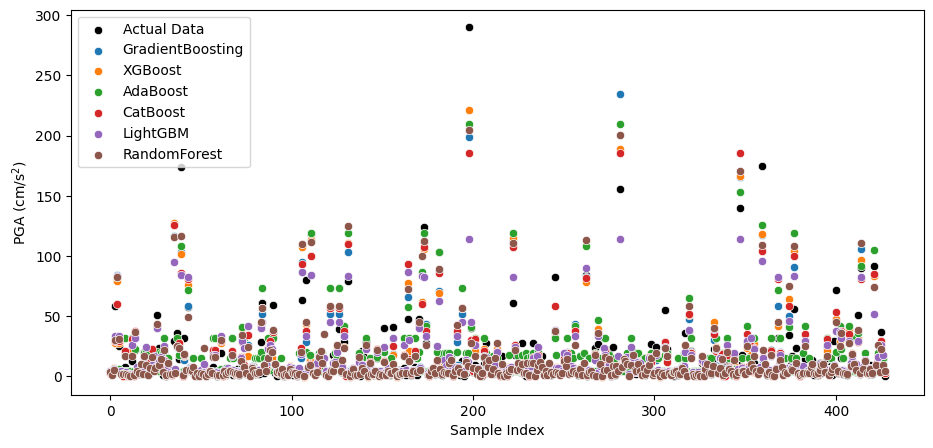

In [21]:
fig, ax = plt.subplots(figsize=(11, 5))

sns.scatterplot(x=range(len(y_test)), y=y_test, ax=ax, label='Actual Data', color='black')
for name in best_models.keys():
    sns.scatterplot(x=range(len(y_test)), y=best_models[name].predict(X_test), ax=ax, label=name)

ax.set_xlabel('Sample Index')
ax.set_ylabel('PGA (cm/s$^2$)')
ax.legend()
plt.show()

In [ ]:
# Estimated PGA values for the test set
X_test_with_predictions = X_test.copy()
for name, model in best_models.items():
    X_test_with_predictions[f'{name}_Predict'] = model.predict(X_test)

# Real PGA values for the test set
X_test_with_predictions['PGA_H'] = y_test.values

# Saving the files
X_test_with_predictions.to_csv('PredictionsandRealDataPGA.csv', index=False)

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0


In [25]:
X_test_with_predictions[['PGA_H','GradientBoosting_Predict','XGBoost_Predict','AdaBoost_Predict','CatBoost_Predict','LightGBM_Predict','RandomForest_Predict']].head(20)

,PGA_H,GradientBoosting_Predict,XGBoost_Predict,AdaBoost_Predict,CatBoost_Predict,LightGBM_Predict,RandomForest_Predict
1542,3.394821,3.461722,2.980883,4.487150,2.801717,4.090372,3.134968
233,2.520427,3.786486,2.394756,4.487150,2.946850,4.161124,1.286085
441,4.839062,6.842013,6.672174,4.722323,5.530475,6.173658,4.929479
301,58.197012,28.712847,27.563147,5.673804,29.086828,33.665720,29.783380
1932,83.204129,84.307838,79.539177,82.065212,60.431388,83.207242,82.531090
302,25.264965,32.777949,27.563147,5.673804,29.086828,33.665720,30.934588
1376,2.850165,3.461722,3.052472,4.487150,3.570559,4.263535,1.843905
1792,0.391400,0.778689,0.483093,4.487150,-0.078227,2.440259,1.616735
70,7.595974,18.680744,18.218742,31.845861,20.991861,16.582951,16.681557
533,1.042139,3.281081,2.839018,4.722323,2.429528,3.262077,1.527668


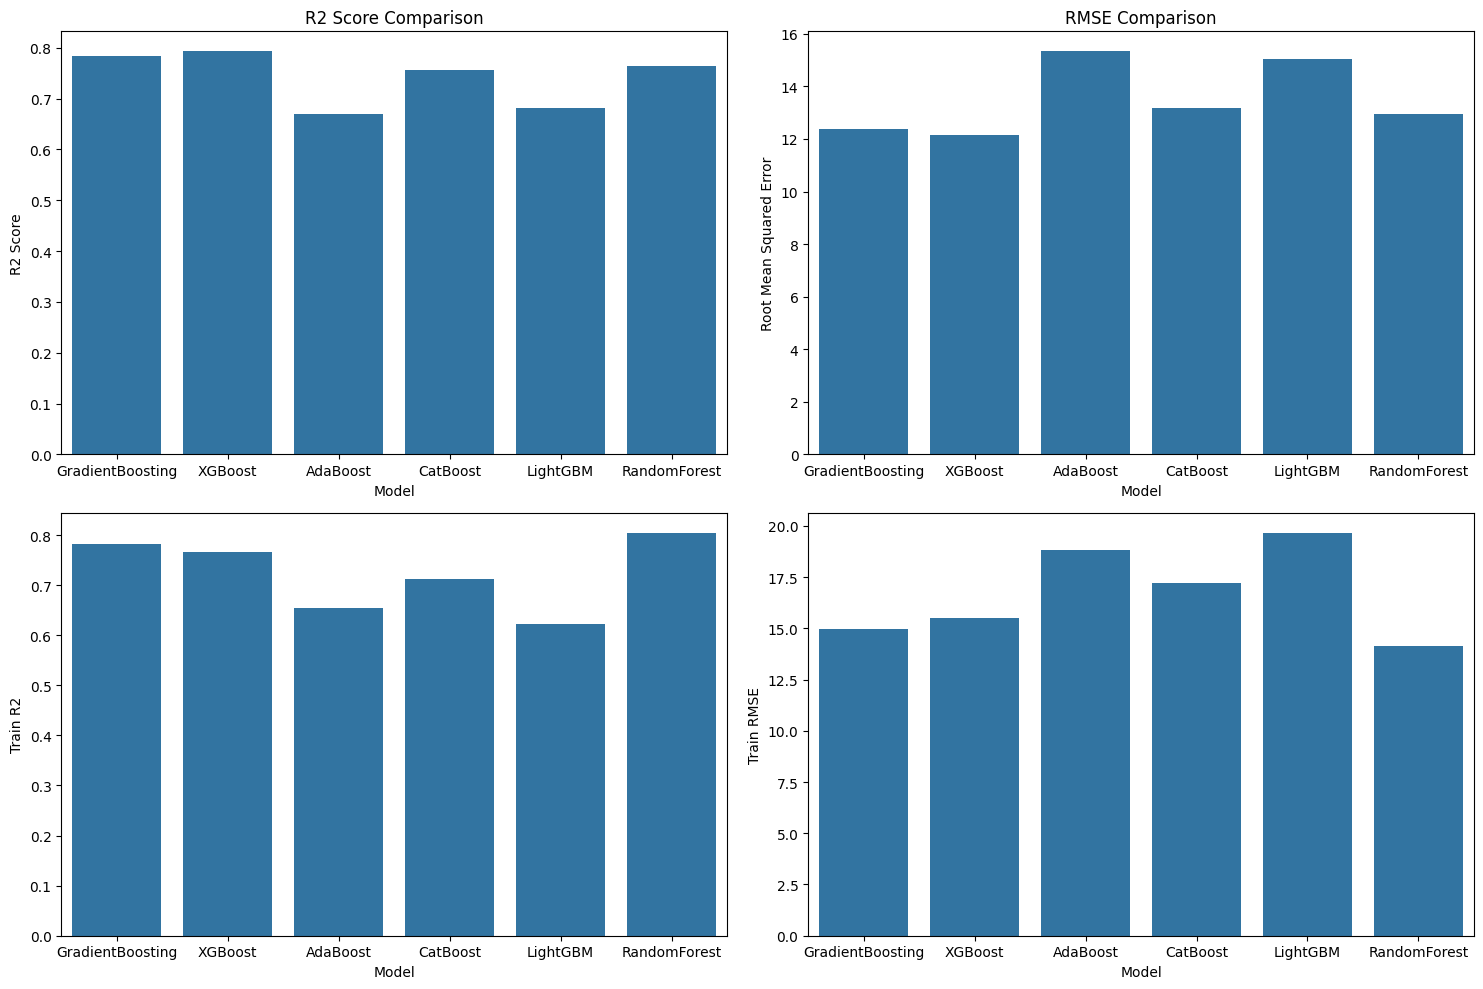

In [26]:
results_data = pd.read_csv('model_results_with_train_test_comparison.csv')

results_df = pd.DataFrame(results_data)

# Plot the results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.barplot(x='Model', y='Test R2', data=results_df, ax=axes[0, 0])
axes[0, 0].set_title('R2 Score Comparison')
axes[0, 0].set_ylabel('Test R2 Score')

sns.barplot(x='Model', y='Test RMSE', data=results_df, ax=axes[0, 1])
axes[0, 1].set_title('RMSE Comparison')
axes[0, 1].set_ylabel('Test Root Mean Squared Error')


sns.barplot(x='Model', y='Train R2', data=results_df, ax=axes[1, 0])
axes[0, 0].set_title('R2 Score Comparison')
axes[0, 0].set_ylabel('R2 Score')

sns.barplot(x='Model', y='Train RMSE', data=results_df, ax=axes[1, 1])
axes[0, 1].set_title('RMSE Comparison')
axes[0, 1].set_ylabel('Root Mean Squared Error')


plt.tight_layout()
plt.show()

## Horizontal PGA ANN addition

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='tanh',
                     learning_rate='adaptive', max_iter=5000, random_state=42)

model.fit(X_train, y_train)



MLPRegressor(activation='tanh', hidden_layer_sizes=(100, 50),
             learning_rate='adaptive', max_iter=5000, random_state=42)

In [31]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)

print(f"R²:   {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"MAE:  {mean_absolute_error(y_test, y_pred):.4f}")

R²:   0.6490
RMSE: 15.8030
MAE:  6.9889


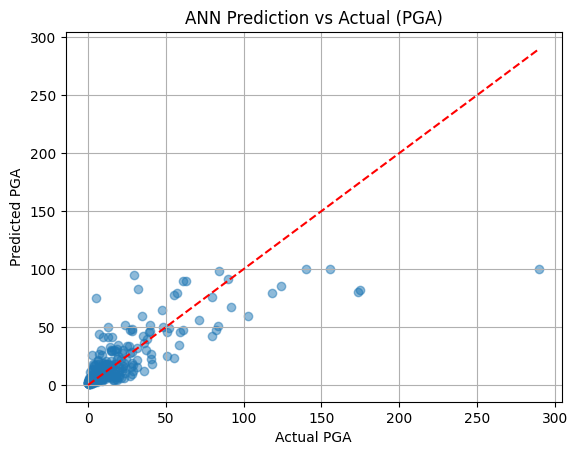

In [32]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual PGA")
plt.ylabel("Predicted PGA")
plt.title("ANN Prediction vs Actual (PGA)")
plt.grid(True)
plt.show()